<a href="https://colab.research.google.com/github/Duwaysan/T5-Week1-Exam/blob/main/Task_(1)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task 1/Task (1) Dataset.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

(12316, 32)

In [9]:
df.sample(3)
#df.iloc[20]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4133,1900-01-01 18:26:00,Thursday,Under 18,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
2861,1900-01-01 08:38:00,Tuesday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Serious Injury
7980,1900-01-01 08:30:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Public (12 seats),Organization,Above 10yr,...,Going straight,Driver or rider,Male,18-30,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


### Handle Missing Values

In [5]:
#df.isnull().sum() #since all rows have less than half null entities no column will be dropped
for col in df:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])#object
  else :
    df[col] = df[col].fillna(df[col].mean())#int
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

### Correct any inconsistent data entries.

In [6]:
from sklearn.preprocessing import StandardScaler
for col in df: #check for unique values
  print(df[col].unique())# we notice that inconsistent entries: 'Unknown', 'Na'
  print('-------------')
#now we know how structured the data will be
for col in df:
   if df[col].dtype == 'datetime64[ns]':
     continue
   elif df[col].dtype == 'category':
     df[col] = df[col].replace('Unknown', df[col].mode()[0])
     df[col] = df[col].replace('Na', df[col].mode()[0])
     df[col] = df[col].str.replace('\W', '', regex=True)


['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
-------------
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
-------------
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
-------------
['Male' 'Female' 'Unknown']
-------------
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
-------------
['Employee' 'Unknown' 'Owner' 'Other']
-------------
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
-------------
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
-------------
['Owner' 'Governmental' 'Organization' 'Other']
-------------
['Above 10yr' '5-10yrs' 'Unknown' '1-2yr' '2-5yrs' 'Below 1yr']
-------------
['No defect' '7' '5']
-------------
['Resi

### Ensure data types are appropriate for each column.

---



In [7]:

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
for col in df:
  if df[col].dtype == 'datetime64[ns]':
    continue
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
  elif df[col].dtype == 'int64':
    continue

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  category      
 2   Age_band_of_driver           12316 non-null  category      
 3   Sex_of_driver                12316 non-null  category      
 4   Educational_level            12316 non-null  category      
 5   Vehicle_driver_relation      12316 non-null  category      
 6   Driving_experience           12316 non-null  category      
 7   Type_of_vehicle              12316 non-null  category      
 8   Owner_of_vehicle             12316 non-null  category      
 9   Service_year_of_vehicle      12316 non-null  category      
 10  Defect_of_vehicle            12316 non-null  category      
 11  Area_accident_occured        12316 non-nu

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [8]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,12316,12316.000000,12316.000000
mean,1900-01-01 14:17:50.768106496,2.040679,1.548149
min,1900-01-01 00:01:00,1.000000,1.000000
25%,1900-01-01 10:31:00,2.000000,1.000000
50%,1900-01-01 15:10:00,2.000000,1.000000
75%,1900-01-01 18:10:00,2.000000,2.000000
max,1900-01-01 23:59:00,7.000000,8.000000
std,NaN,0.688790,1.007179


### Identify and analyze patterns in the data.

In [11]:

accident_count_per_cause = df.groupby('Cause_of_accident')['Cause_of_accident'].count() #Number of accident
Number_of_casualties_per_accident = df.groupby('Cause_of_accident')['Number_of_casualties'].sum() # most casualties comes with which type of accident
print(Number_of_casualties_per_accident)
print(accident_count_per_cause)

Cause_of_accident
Changing lane to the left               2348
Changing lane to the right              2851
Driving at high speed                    260
Driving carelessly                      2160
Driving to the left                      450
Driving under the influence of drugs     551
Drunk driving                             50
Getting off the vehicle improperly       286
Improper parking                          50
Moving Backward                         1748
No distancing                           3459
No priority to pedestrian               1042
No priority to vehicle                  1885
Other                                    720
Overloading                               90
Overspeed                                 92
Overtaking                               661
Overturning                              207
Turnover                                 120
Unknown                                   37
Name: Number_of_casualties, dtype: int64
Cause_of_accident
Changing lane to the le

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

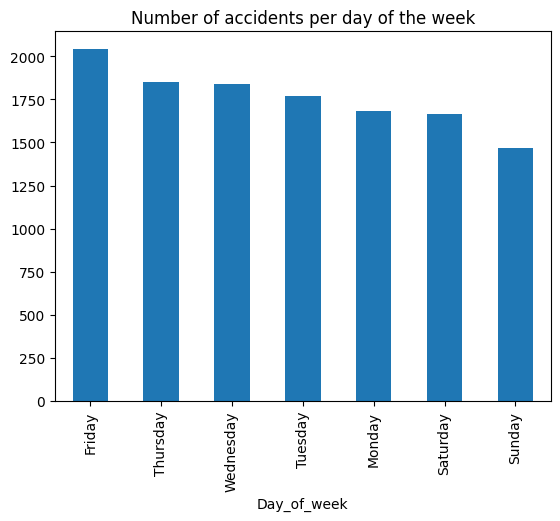

In [156]:
df['Day_of_week'].value_counts().plot(kind='bar')
plt.title('Number of accidents per day of the week')
plt.show()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


In [13]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
correlation_matrix # weak relation between the two
age_casualties = df.groupby('Age_band_of_casualty')['Number_of_casualties'].sum() #Total casualties per age
print(age_casualties)



Age_band_of_casualty
18-30       4915
31-50       3740
5            433
Over 51     1572
Under 18    1610
na          6797
Name: Number_of_casualties, dtype: int64


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


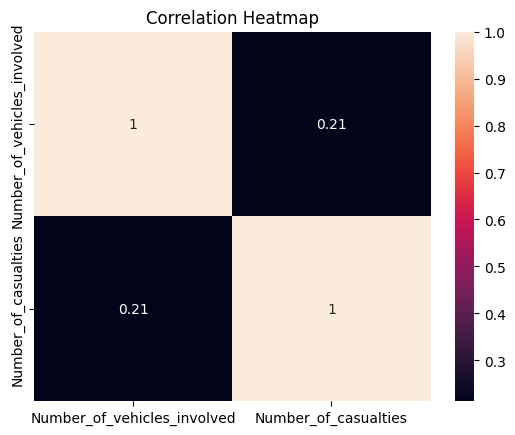

In [160]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

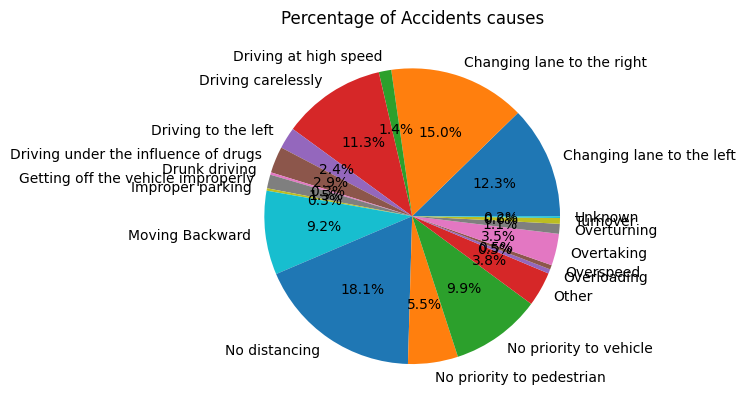

In [22]:
plt.pie(Number_of_casualties_per_accident, labels=accident_count_per_cause.index, autopct='%.1f%%')
plt.title('Percentage of Accidents causes')
plt.show()

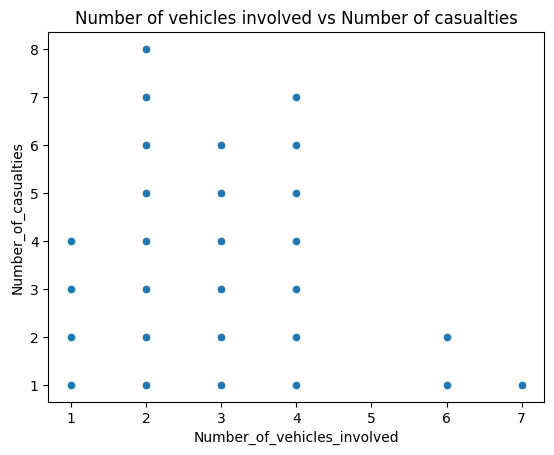

In [20]:
sns.scatterplot(data = df, x='Number_of_vehicles_involved', y='Number_of_casualties')
plt.title('Casualties with vehicles involved ')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# the data set has a lot of corrupted data which is a loss of information
# data are
# we know from  our data analysis that most of the accident caused by no distancing
# Most accidents comes with old people and mid age